# Линейная регрессия (подготовка)




In [ ]:
import numpy as np # линейная алгебра
import pandas as pd # обработка данных
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

import os

In [ ]:
Sum_Weather = pd.read_csv("/content/Summary of Weather.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Sum_Weather.head(2)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Sum_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [ ]:
Sum_Weather.describe().T

,count,mean,std,min,25%,50%,75%,max
STA,119040.0,29659.435795,20953.209402,10001.000000,11801.000000,22508.000000,33501.000000,82506.000000
WindGustSpd,532.0,37.774534,10.297808,18.520000,29.632000,37.040000,43.059000,75.932000
MaxTemp,119040.0,27.045111,8.717817,-33.333333,25.555556,29.444444,31.666667,50.000000
MinTemp,119040.0,17.789511,8.334572,-38.333333,15.000000,21.111111,23.333333,34.444444
MeanTemp,119040.0,22.411631,8.297982,-35.555556,20.555556,25.555556,27.222222,40.000000
YR,119040.0,43.805284,1.136718,40.000000,43.000000,44.000000,45.000000,45.000000
MO,119040.0,6.726016,3.425561,1.000000,4.000000,7.000000,10.000000,12.000000
DA,119040.0,15.797530,8.794541,1.000000,8.000000,16.000000,23.000000,31.000000
DR,533.0,26.998124,15.221732,2.000000,11.000000,32.000000,34.000000,78.000000
SPD,532.0,20.396617,5.560371,10.000000,16.000000,20.000000,23.250000,41.000000


In [ ]:
# Извлечение 3 столбцов "MaxTemp", "MinTemp", "Date" для чистого и лучшего отображения
Sum_Weather_df = Sum_Weather[['MaxTemp','MinTemp', 'Date']]

In [ ]:
Sum_Weather_df = Sum_Weather_df[:][:500]      # давайте возьмем предел для вычисления регрессионной оценки
Sum_Weather_df.head(2)

,MaxTemp,MinTemp,Date
0,25.555556,22.222222,1942-7-1
1,28.888889,21.666667,1942-7-2


In [ ]:
pd.to_datetime(Sum_Weather_df['Date'])

0     1942-07-01
1     1942-07-02
2     1942-07-03
3     1942-07-04
4     1942-07-05
         ...    
495   1943-11-08
496   1943-11-09
497   1943-11-10
498   1943-11-11
499   1943-11-12
Name: Date, Length: 500, dtype: datetime64[ns]

No handles with labels found to put in legend.


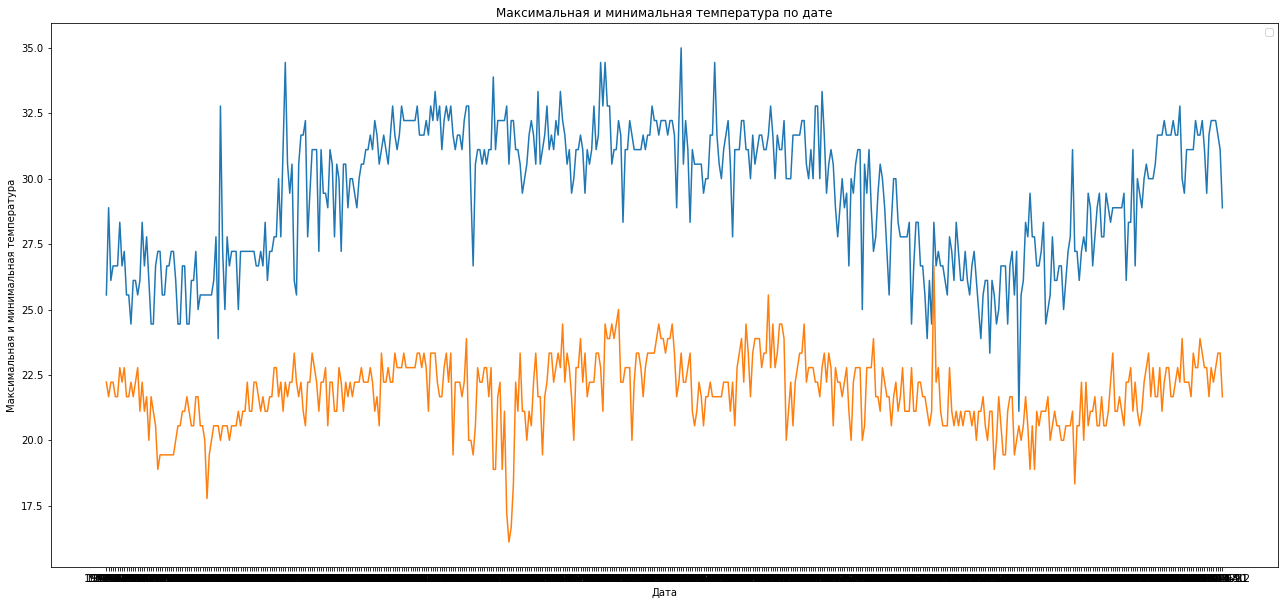

In [ ]:
# См. рисунок с помощью метода scatter или plot

plt.figure(figsize=(22,10))
plt.plot(Sum_Weather_df.Date, Sum_Weather_df.MaxTemp, Sum_Weather_df.MinTemp,)
plt.title("Максимальная и минимальная температура по дате")
plt.xlabel("Дата")
plt.ylabel("Максимальная и минимальная температура")
plt.legend()
plt.show()

In [ ]:
# проверим, сколько у нас нулевых значений
Sum_Weather_df.isnull().sum()

MaxTemp    0
MinTemp    0
Date       0
dtype: int64

In [ ]:
# Отбор характеристик
y = np.array(Sum_Weather_df['MaxTemp']).reshape(-1, 1)
X = np.array(Sum_Weather_df['MinTemp']).reshape(-1, 1)

In [ ]:
# Разделение данных: %20 - тест, %80 - тренировка
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#Линейная регрессия (решение)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lin_df.predict(X_test)                                     # Прогнозирование Линейной регрессионной модели Модели
accuracy_score = lin_df.score(X_test, y_test)                       # Оценка точности
print("Оценка Точности Модели Линейной Регрессии: " + "{:.1%}".format(accuracy_score))

Оценка Точности Модели Линейной Регрессии: 3.3%


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("RMSE Оценка за тестовый набор: " +"{:.2}".format(rmse))
print("R2 Оценка: " +"{:.3}".format(r2_score(y_test, y_pred)));

RMSE Оценка за тестовый набор: 2.0
R2 Оценка: 0.0327


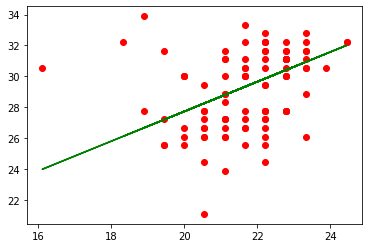

In [ ]:
# Напоследок нарисуем фигуру линейной регрессионной модели
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

#Решающее дерево

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()          # Создадим решающее дерево с помощью sklearn
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dt_predict = dt_reg.predict(X_train)

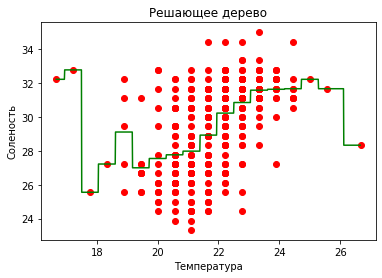

In [ ]:
plt.scatter(X_train,y_train, color="red")                           # точки
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="g")                 # линия
plt.xlabel("Температура")
plt.ylabel("Соленость") 
plt.title("Решающее дерево")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,dt_predict))
r2 = r2_score(y_train,dt_predict)
print("RMSE Оценка за тестовый набор: " +"{:.2}".format(rmse))
print("R2 Оценка за тестовый набор: " +"{:.2}".format(r2))

RMSE Оценка за тестовый набор: 2.0
R2 Оценка за тестовый набор: 0.36


#Рандомный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=5, random_state=0)
rf_reg.fit(X_train,y_train)
rf_predict = rf_reg.predict(X_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


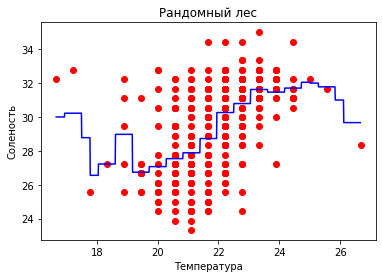

In [ ]:
plt.scatter(X_train,y_train, color="red")                           # точки
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf_reg.predict(X_grid),color="b")                 # линии
plt.xlabel("Температура")
plt.ylabel("Соленость")
plt.title("Рандомный лес")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,rf_predict))
r2 = r2_score(y_train,rf_predict)
print("RMSE Оценка за тестовый набор: " +"{:.2}".format(rmse))
print("R2 SОценка за тестовый набор: " +"{:.2}".format(r2))

RMSE Оценка за тестовый набор: 2.0
R2 SОценка за тестовый набор: 0.35
